# Wikipedia Notable Life Expectancies

# [Notebook 5 of : Data Cleaning](https://github.com/teresahanak/wikipedia-life-expectancy/blob/main/wp_life_expect_data_clean4_thanak_2022_06_23.ipynb)

## Context

The


## Objective

The

### Data Dictionary

- Feature: Description

## Importing Necessary Libraries

In [2]:
# To structure code automatically
%load_ext nb_black

# To import/export sqlite databases
import sqlite3 as sql

# To save/open python objects in pickle file
import pickle

# To help with reading, cleaning, and manipulating data
import pandas as pd
import numpy as np
import re

# For visualization
import matplotlib.pyplot as plt
import seaborn as sns

# To define maximum number of columns to be displayed in a dataframe
pd.set_option("display.max_columns", None)
# To define the maximum number of rows to be displayed in a dataframe
pd.set_option("display.max_rows", 200)

# To supress warnings
# import warnings

# warnings.filterwarnings("ignore")

# To set some visualization attributes
pd.set_option("max_colwidth", 150)

# To play auditory cue when cell has executed, has warning, or has error and set chime theme
import chime

chime.theme("zelda")

<IPython.core.display.Javascript object>

## Data Overview

### Reading, Sampling, and Checking Data Shape

In [3]:
# Reading the dataset
conn = sql.connect("wp_life_expect_clean3.db")
data = pd.read_sql("SELECT * FROM wp_life_expect_clean3", conn)

# Making a working copy
df = data.copy()

# Checking the shape
print(f"There are {df.shape[0]} rows and {df.shape[1]} columns.")

# Checking first 2 rows of the data
df.head(2)

There are 132652 rows and 24 columns.


,day,name,info,link,num_references,year,month,info_parenth,info_1,info_2,info_3,info_4,info_5,info_6,info_7,info_8,info_9,info_10,info_11,age,cause_of_death,place_1,place_2,info_parenth_copy
0,1,William Chappell,", 86, British dancer, ballet designer and director.",https://en.wikipedia.org/wiki/William_Chappell_(dancer),21,1994,January,None,None,dancer,ballet designer director,None,None,None,None,None,None,None,None,86.0,None,United Kingdom of Great Britain and Northern Ireland,None,None
1,1,Raymond Crotty,", 68, Irish economist, writer, and academic.",https://en.wikipedia.org/wiki/Raymond_Crotty,12,1994,January,None,None,economist,writer,and academic,None,None,None,None,None,None,None,68.0,None,Ireland,None,None


<IPython.core.display.Javascript object>

In [4]:
# Checking last 2 rows of the data
df.tail(2)

,day,name,info,link,num_references,year,month,info_parenth,info_1,info_2,info_3,info_4,info_5,info_6,info_7,info_8,info_9,info_10,info_11,age,cause_of_death,place_1,place_2,info_parenth_copy
132650,9,Oleg Moliboga,", 69, Russian volleyball player, Olympic champion and coach.",https://en.wikipedia.org/wiki/Oleg_Moliboga,2,2022,June,,None,volleyball player,Olympic champion coach,None,None,None,None,None,None,None,None,69.0,None,Russia,None,1980
132651,9,Zou Jing,", 86, Chinese engineer, member of the Chinese Academy of Engineering.",https://en.wikipedia.org/wiki/Zou_Jing_(engineer),3,2022,June,None,None,engineer,member of the Academy of Engineering,None,None,None,None,None,None,None,None,86.0,None,"China, People's Republic of",None,None


<IPython.core.display.Javascript object>

In [5]:
# Checking a sample of the data
df.sample(5)

,day,name,info,link,num_references,year,month,info_parenth,info_1,info_2,info_3,info_4,info_5,info_6,info_7,info_8,info_9,info_10,info_11,age,cause_of_death,place_1,place_2,info_parenth_copy
35477,4,Sheldon Brown,", 63, American bicycle mechanic and technical authority, heart attack.",https://en.wikipedia.org/wiki/Sheldon_Brown_(bicycle_mechanic),48,2008,February,None,None,bicycle mechanic technical authority,heart attack,None,None,None,None,None,None,None,None,63.0,None,United States of America,None,None
29521,10,James Yancey,"aka J Dilla, 32, American hip hop record producer and MC, lupus nephritis.",https://en.wikipedia.org/wiki/J_Dilla,56,2006,February,None,None,hip hop record producer MC,lupus nephritis,None,None,None,None,None,None,None,None,32.0,None,United States of America,None,None
21570,10,Lawrence H. Fountain,", 89, American politician .",https://en.wikipedia.org/wiki/Lawrence_H._Fountain,1,2002,October,Representative for North Carolina nd congressional district,None,politician,None,None,None,None,None,None,None,None,None,89.0,None,United States of America,United States of America,Representative for North Carolina 2nd congressional district
99804,9,Riccardo Giacconi,", 87, Italian-born American astrophysicist, Nobel Prize laureate .",https://en.wikipedia.org/wiki/Riccardo_Giacconi,8,2018,December,,None,astrophysicist,Nobel Prize laureate,None,None,None,None,None,None,None,None,87.0,None,Italy,United States of America,2002
99606,27,Mahito Tsujimura,", 88, Japanese actor and voice actor .",https://en.wikipedia.org/wiki/Mahito_Tsujimura,4,2018,November,,None,actor voice actor,None,None,None,None,None,None,None,None,None,88.0,None,Japan,None,


<IPython.core.display.Javascript object>

### Checking Data Types, Duplicates, and Null Values

In [6]:
# Checking data types and null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132652 entries, 0 to 132651
Data columns (total 24 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   day                132652 non-null  object 
 1   name               132652 non-null  object 
 2   info               132652 non-null  object 
 3   link               132652 non-null  object 
 4   num_references     132652 non-null  object 
 5   year               132652 non-null  int64  
 6   month              132652 non-null  object 
 7   info_parenth       49830 non-null   object 
 8   info_1             35 non-null      object 
 9   info_2             132604 non-null  object 
 10  info_3             62571 non-null   object 
 11  info_4             12605 non-null   object 
 12  info_5             1497 non-null    object 
 13  info_6             216 non-null     object 
 14  info_7             31 non-null      object 
 15  info_8             6 non-null       object 
 16  in

<IPython.core.display.Javascript object>

#### Observations:
- Due to the diversity of entries for `known_for`, we may need to prioritize entries for the extraction of this feature.
- To do so, we will proceed with typecasting num_references as integer, so we can determine which entries have more references.
- We will also make a copy of the `info_parenth` column, as we will alter that column and the information it contains is no longer present in the original `info` column.

#### Typecasting `num_references` as Integer

In [7]:
# Typecasting num_references as int64
df.loc[:, "num_references"] = df.loc[:, "num_references"].astype("int64")

<IPython.core.display.Javascript object>

### `num_references`

In [8]:
df["num_references"].describe()

count    132652.000000
mean          9.790406
std          19.436805
min           0.000000
25%           2.000000
50%           5.000000
75%          10.000000
max         837.000000
Name: num_references, dtype: float64

<IPython.core.display.Javascript object>

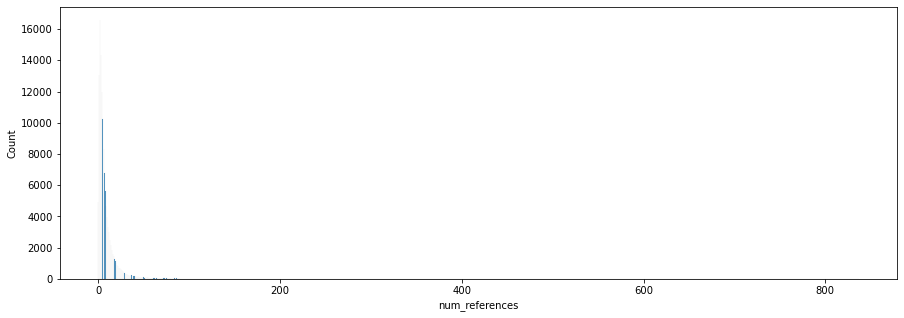

<IPython.core.display.Javascript object>

In [9]:
# Histplot of num_references
plt.figure(figsize=(15, 5))
sns.histplot(data=df, x="num_references")
plt.show()

#### Observations:
- The distribution of `num_references` is highly right skewed.
- We will verify some verifying of links to make sure the pages are for individuals.

In [10]:
# Example of verifying links (repeated in groups of 100 until num_references <100)
df.sort_values(by="num_references", ascending=False)[:10]

,day,name,info,link,num_references,year,month,info_parenth,info_1,info_2,info_3,info_4,info_5,info_6,info_7,info_8,info_9,info_10,info_11,age,cause_of_death,place_1,place_2,info_parenth_copy
36579,19,Bill Andress,", 83, American baseball umpire.",https://en.wikipedia.org/wiki/Bill_Andress,837,2008,May,None,None,baseball umpire,None,None,None,None,None,None,None,None,None,83.0,None,United States of America,None,None
11356,14,Frank Sinatra,", 82, American singer , heart attack.",https://en.wikipedia.org/wiki/Frank_Sinatra,660,1998,May,"""My Way"", ""That Life"" actor Oscar, winner",None,singer,heart attack,None,None,None,None,None,None,None,None,82.0,None,United States of America,None,"""My Way"", ""That Life"" actor Oscar, 1954 winner"
35265,17,Bobby Fischer,", 64, American chess grandmaster, world champion , kidney failure.",https://en.wikipedia.org/wiki/Bobby_Fischer,631,2008,January,,None,chess grandmaster,world champion,kidney failure,None,None,None,None,None,None,None,64.0,None,United States of America,None,1972 1975
26014,11,Keith Miller,", 84, Australian Test cricketer, Australian rules footballer, fighter pilot and journalist.",https://en.wikipedia.org/wiki/Keith_Miller,586,2004,October,None,None,Test cricketer,rules footballer,fighter pilot journalist,None,None,None,None,None,None,None,84.0,None,Australia,Australia,None
35003,28,Benazir Bhutto,", 54, Pakistani opposition leader and former prime minister , assassinated.",https://en.wikipedia.org/wiki/Benazir_Bhutto,554,2007,December,",",None,opposition leader former prime minister,assassinated,None,None,None,None,None,None,None,None,54.0,None,Pakistan,None,"1988 1990, 1993 1996"
85511,25,Fidel Castro,", 90, Cuban politician, Prime Minister .",https://en.wikipedia.org/wiki/Fidel_Castro,531,2016,November,", President",None,politician,Prime Minister,None,None,None,None,None,None,None,None,90.0,None,Cuba,None,"1959 1976, President 1976 2008"
60287,5,Hugo Chávez,", 58, Venezuelan politician and military officer, President , heart attack.",https://en.wikipedia.org/wiki/Hugo_Ch%C3%A1vez,529,2013,March,since,None,politician military officer,President,heart attack,None,None,None,None,None,None,None,58.0,None,Venezuela,None,since 1999
97905,25,John McCain,", 81, American politician and Navy officer, member of the U.S. Senate , glioblastoma.",https://en.wikipedia.org/wiki/John_McCain,528,2018,August,since House of Representatives,None,politician Navy officer,member of the Senate,glioblastoma,None,None,None,None,None,None,None,81.0,None,United States of America,None,since 1987 House of Representatives 1983 1987
51541,20,Muammar Gaddafi,", 69, Libyan leader , shooting.",https://en.wikipedia.org/wiki/Muammar_Gaddafi,519,2011,October,,None,leader,shooting,None,None,None,None,None,None,None,None,69.0,None,Libya,None,1969 2011
105520,6,Robert Mugabe,", 95, Zimbabwean revolutionary and politician, President , cancer.",https://en.wikipedia.org/wiki/Robert_Mugabe,519,2019,September,Prime Minister,None,revolutionary politician,President,cancer,None,None,None,None,None,None,None,95.0,None,Zimbabwe,None,1987 2017 Prime Minister 1980 1987


<IPython.core.display.Javascript object>

#### Observations:
- Some links point to lists, such as the entry with the maximum `num_references` for Bill Andress.
- Also, there are several entries that point to a list of German World War II medal recipiants.
- We will make a list of these links and change their `num_references` values to 1.

In [11]:
# Creating list of links containing "German" with over 20 references
checklist = [
    index
    for index in df.index
    if "German" in df.loc[index, "info"] and df.loc[index, "num_references"] > 20
]
link_list = df.loc[checklist, "link"].tolist()

<IPython.core.display.Javascript object>

In [12]:
# # Code used to go verify links
# print(link_list.pop())

<IPython.core.display.Javascript object>

In [13]:
# List of links that point to pages with lists of individuals
link_is_list = [
    "https://en.wikipedia.org/wiki/Bill_Andress",
    "https://en.wikipedia.org/wiki/Joachim_Boosfeld",
    "https://en.wikipedia.org/wiki/Alfred_Eick",
    "https://en.wikipedia.org/wiki/Gerhard_Fischer_(soldier)",
    "https://en.wikipedia.org/wiki/Arthur_B%C3%BCssecke",
    "https://en.wikipedia.org/wiki/Hans-G%C3%BCnther_Lange",
    "https://en.wikipedia.org/wiki/Waldemar_von_Gazen",
    "https://en.wikipedia.org/wiki/Heinz_Angelmaier",
    "https://en.wikipedia.org/wiki/Herbert_Fries",
    "https://en.wikipedia.org/wiki/Friedrich_Carl_(officer)",
    "https://en.wikipedia.org/wiki/Karl-Heinz_Altermann",
    "https://en.wikipedia.org/wiki/Paul_Brasack",
    "https://en.wikipedia.org/wiki/Walther_Gerhold",
    "https://en.wikipedia.org/wiki/Siegfried_Gerstner",
    "https://en.wikipedia.org/wiki/Alois_Schnaubelt",
    "https://en.wikipedia.org/wiki/Karl-Heinz_Wiebe",
    "https://en.wikipedia.org/wiki/Hans-Hermann_Sturm",
    "https://en.wikipedia.org/wiki/Siegfried_Jamrowski",
    "https://en.wikipedia.org/wiki/Franz_Kieslich",
    "https://en.wikipedia.org/wiki/Wilhelm_Lehner",
    "https://en.wikipedia.org/wiki/Fritz_Langanke",
    "https://en.wikipedia.org/wiki/Achim_Wunderlich",
    "https://en.wikipedia.org/wiki/Viktor_Vitali",
    "https://en.wikipedia.org/wiki/Wilhelm_Noller",
    "https://en.wikipedia.org/wiki/Heinrich_Sonne",
    "https://en.wikipedia.org/wiki/Ludwig_Meister",
    "https://en.wikipedia.org/wiki/Oskar_Sch%C3%A4fer",
    "https://en.wikipedia.org/wiki/Karl_Brommann",
    "https://en.wikipedia.org/wiki/Friedrich_Adrario",
    "https://en.wikipedia.org/wiki/Werner_Freiherr_von_Beschwitz",
    "https://en.wikipedia.org/wiki/Hans-Georg_Borck",
    "https://en.wikipedia.org/wiki/Wilhelm_Weidenbr%C3%BCck",
    "https://en.wikipedia.org/wiki/Klaus_Feldt",
    "https://en.wikipedia.org/wiki/Erwin_Bachmann",
    "https://en.wikipedia.org/wiki/List_of_Knight%27s_Cross_of_the_Iron_Cross_recipients_(Bn%E2%80%93Bz)",
    "https://en.wikipedia.org/wiki/List_of_German_supercentenarians#Hermann_Dörnemann",
    "https://en.wikipedia.org/wiki/List_of_Knight%27s_Cross_of_the_Iron_Cross_recipients_(Ba%E2%80%93Bm)",
    "https://en.wikipedia.org/wiki/Family_of_Barack_Obama#Stanley_Armour_Dunham",
    "https://en.wikipedia.org/wiki/Mbah_Gotho",
]

<IPython.core.display.Javascript object>

#### Changing `num_references` to 1 where Entry Link Points to a List Page

In [14]:
# Creating list of row indexes with links that point to lists
rows_to_treat = [index for index in df.index if df.loc[index, "link"] in link_is_list]

# Treating num_references for these entries
df.loc[rows_to_treat, "num_references"] = 1

# Checking a sample of rows
df.loc[rows_to_treat, :].sample(2)

,day,name,info,link,num_references,year,month,info_parenth,info_1,info_2,info_3,info_4,info_5,info_6,info_7,info_8,info_9,info_10,info_11,age,cause_of_death,place_1,place_2,info_parenth_copy
60236,2,Walther Gerhold,", 91, German Marine-Schreiber-Obergefreiter in the Kriegsmarine during World War II.",https://en.wikipedia.org/wiki/Walther_Gerhold,1,2013,March,None,None,Marine Schreiber Obergefreiter in the during World War II,None,None,None,None,None,None,None,None,None,91.0,None,Germany,None,None
70056,9,Gerhard Fischer,", 98, German army officer, recipient of the Knight's Cross of the Iron Cross.",https://en.wikipedia.org/wiki/Gerhard_Fischer_(soldier),1,2014,August,None,None,army officer,recipient of the Knight Cross of the Iron Cross,None,None,None,None,None,None,None,None,98.0,None,Germany,None,None


<IPython.core.display.Javascript object>

#### Observations:
- With those entries treated, and the other top entries verified, let us take another look at the summary statistics and distribution of `num_references`.

In [15]:
# Summary statistics of updated num_references
df["num_references"].describe()

count    132652.000000
mean          9.734719
std          19.061117
min           0.000000
25%           2.000000
50%           5.000000
75%          10.000000
max         660.000000
Name: num_references, dtype: float64

<IPython.core.display.Javascript object>

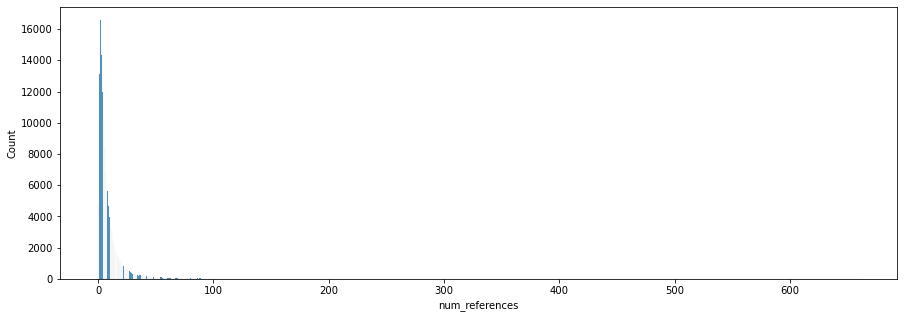

<IPython.core.display.Javascript object>

In [16]:
# Histplot of updated num_references
plt.figure(figsize=(15, 5))
sns.histplot(data=df, x="num_references")
plt.show()

#### Observations:
- The distribution of `num_references` remains highly right skewed.
- 25% of entries have 2 or fewer references, which may be a good cutoff to search for `known_for` values.
- Let us view the log transformation of the feature, both for the full dataset, and for `num_references` > 2.

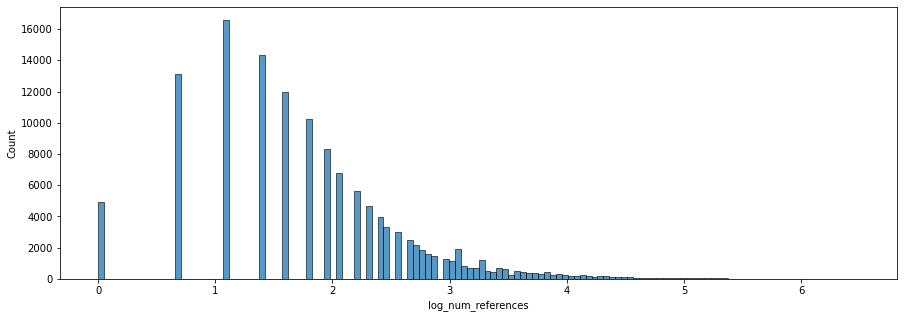

<IPython.core.display.Javascript object>

In [17]:
# Adding column for log_num_references
df["log_num_references"] = df["num_references"].apply(lambda x: np.log(x + 1))

# Histplot of log_num_references
plt.figure(figsize=(15, 5))
sns.histplot(data=df, x="log_num_references")
plt.show()

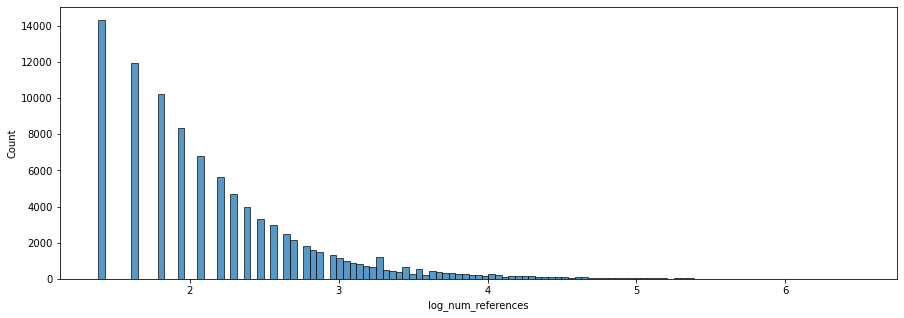

<IPython.core.display.Javascript object>

In [18]:
# Histplot of log_num_references where num_references > 2
plt.figure(figsize=(15, 5))
sns.histplot(data=df[df["num_references"] > 2], x="log_num_references")
plt.show()

#### Observations:
- The distribution is certainly more normalized with the log transformation, but follows a consistent curve for values > 2.
- For this analysis, we will focus on these more noted entries.

## Extracting `known_for` Data
Our goal will be to have some broader categories into which the specific values will fit.  `known_for` is a diverse feature, in that an individual may be known for a long-term role or roles, a specific event, a relationship with another person who is famous, etc.  So, to some extent we will see what we find and adapt as we go.

Also, we will abandon searching left to right as an individual may fit more than one category, and in no particular order.  For example, Ronald Reagan, is entered as "American actor and politician".  He is most known as the 40th president of The United States, so if we prioritized the first value, he would fit only into the category containing actor.  At the same time, it may have been his acting career that led to his political career.  Both arenas are relevant, so we will aim to capture all categories for an individual.

We will take the following approach:
1. create and check a list of unique values in `info_2` using value_counts, in ascending order.
2. using the pop() method, add each role to it's associated category's set, below, taking care to screen and clarify values that may have multiple meanings, and adding those clarified values to the lists as indicated.
3. combine the sets for each category into one dictionary.
4. Create a corresponding column for each category, initialized equal to 0.
5. search for the values in the dictionary and change the category column to 1 if at least 1 match is found.
6. Rather than importing our previous `other_species` list, we will start anew and include it in our search here.

#### Restricting our Dataset to Entries with More than 2 References

In [19]:
# Limiting the dataset to entries with > 2 references
df = df[df["num_references"] > 2]
print(f"There are {len(df)} remaining entries in the dataframe.")

There are 98061 remaining entries in the dataframe.


<IPython.core.display.Javascript object>

#### Finding `known_for` Roles in `info_1`

In [20]:
# Obtaining values for column and their counts
roles_list = df["info_1"].value_counts(ascending=True).index.tolist()

<IPython.core.display.Javascript object>

In [21]:
# Code to check each value
roles_list.pop()

'early'

<IPython.core.display.Javascript object>

#### Creating Lists for Each `known_for` Category

In [22]:
# Creating lists for each category
politics_govt_law = [  # Contains leader
    "politician",
    "political leader",
    "political",
    "politics",
    "labor civil rights leader",
    "civil rights leader",
    "tribal leader",
    "Māori leader",
    "community leader",
    "al Qaeda leader",
    "separatist leader",
    "indigenous leader",
    "opposition leader",
    "Taliban leader",
    "communist leader",
    "Al Qaeda leader",
    "coup leader",
    "activist leader",
    "nationalist leader",
    "Knights of the Ku Klux Klan leader",
    "public policy business leader",
    "leader in the disability rights movement",
    "civic leader",
    "peasant leader",
    "leader of Group",
    "feminist",
    "women rights activist",
    "independence leader",
    "revolutionary leader",
    "traditional leader",
    "coupist",
    "Māori leader",
    "Ga leader",
    "environmental leader",
    "urban homesteading leader",
    "civil leader",
    "Islamist leader",
    "Islamist Al Shabaab leader",
    "Shi'a Islamic leader",
    "Alaska Native leader",
    "Native leader",
    "Corsican nationalism leader",
    "independentism leader",
    "diplomat",
    "deputy leader of al Qaeda",
    "Maoist leader",
    "Ku Klux Klan leader",
    "leader of the Black Panther Party",
    "senior Hamas leader",
    "Hamas leader",
    "black nationalist leader",
    "revolutionary socialist workers' leader",
    "social activist",
    "chairman of the Communist Party",
    "leader of Naxalite",
    "leader of the nazi National Socialist Women League",
    "environmental activist",
    "activist",
    "human rights",
    "civil rights movement leader",
    "civil rights",
    "founder of Hamas",
    "top official in the rebel government",
    "leader of the Communist Party",
    "Prime Minister",
    "prime minister",
    "Prime minister",
    "one of the leaders of the national emancipation movement",
    "native leader",
    "royal prince",
    "Communist leader",
    "junta leader",
    "statesman",
    "stateswoman",
    "Founder first leader of",
    "leader of the GDR",
    "Party student leader later a neo  figure",
    "leader of Communist Party",
    "wife of  leader Leonid Brezhnev",
    "leader of  coup d'état",
    "environmentalist",
    "leader of the People Republic of",
    "leader of the Muslim Brotherhood",
    "nationalist leader of the Grey Wolves",
    "Hitler Youth leader",
    "advocate for women education",
    "Inuit leader",
    "life peer",
    "public leader",
    "leader of Beijing Communist Party",
    "local government leader",
    "government leader",
    "fascist leader of the Independent State of  in World War II",
    "civil servant",
    "congressman",
    "congresswoman",
    "leader of the FNLA",
    "Western Shoshone leader",
    "Chief Minister",
    "white supremacist leader",
    "secular humanist leader",
    "campaigner",
    "health official",
    "disability rights leader",
    "leader and country music",  # singer will capture arts for this entry which is also political
    "Makah leader",
    "First Nations leader",
    "republican",
    "Republican leader",
    "Republican",
    "Democratic leader",
    "Democrat",
    "democrat",
    "coup d'état leader",
    "Communist revolutionary figure",
    "women rights advocate",
    "socialist leader",
    "nationalist",
    "social leader",
    "Sultan",
    "sultan",
    "lawyer",
    "a deputy leader of the Party of Regions",
    "leader of the Progressive Unionist Party",
    "parliamentarian",
    "barrister",
    "revolutionary",
    "leader of the Islamic Renaissance Party of istan",
    "separatist",
    "leader of Al Qaeda",
]

arts = [  # Contains leader
    "artist",
    "choral",
    "conductor",
    "journalist",
    "bandleader",
    "band leader",
    "orchestra leader",
    "Māori performing arts leader",
    "blues saxophonist",
    "blues",
    "saxophonist",
    "saxophone player",
    "steel guitarist",
    "bass guitarist",
    "guitarist",
    "guitar player",
    "bass guitar player",
    "bassist",
    "bassoonist",
    "bassoon player",
    "reed player",
    "Māori kapa haka leader",
    "clarinetist",
    "clarinet player",
    "swing",
    "musician",
    "calligrapher",
    "film producer",
    "soul",
    "jazz",
    "singer",
    "vocalist",
    "R&B",
    "architect",
    "accordion player",
    "accordion",
    "arts leader",
    "bluegrass",
    "mandolinist",
    "author",
    "singer wife of leader founder of Ladysmith Black Mambazo",
    "broadcaster",
    "pianist",
    "writer",
    "novelist",
    "cultural leader",
    "trumpeter",
    "trumpet player",
    "dance",
    "arranger",
    "actress",
    "beauty queen",  # Contains queen
    "founder of exotica musical genre",
    "leader of The Prisonaires",
    "talent agent",
    "percussionist",
    "drummer",
    "leader of the Mary Kaye Trio",
    "salsa",
    "rock musician",
    "trombonist",
    "music executive",
]
sports = [
    "basketball",
    "Olympics",
    "Olympic",
    "Olympian",
    "gymnast",
    "sports",
    "cheerleader",
    "motor racing driver team leader",
    "cricket administrator",
    "yoga instructor",
    "football goalkeeper",    
    "martial artist",  # Before arts
]
sciences = [
    "research scientist",  # Contains research
    "scientist",  # Before law_enf_military_operator
    "nurse",
    "physicist a leader in controlled fusion research",
    "nuclear physicist",
    "physicist",
    "engineer",
    "physician",
    "group leader in the Manhattan Project",
    "ophthalmologist",
    "psychiatrist",
]

business_farming = [  # Contains leader
    "labor leader",
    "trade union leader",
    "labor union leader",
    "union leader",
    "farmers' union leader",
    "farming union leader",
    "union leader",
    "farming leader",
    "farmers' leader",
    "realtor",
    "trade unionist",
    "stamp printer",
    "industrialist",
    "businesswoman",
    "businessman",
    "farmer",
    "financier",
    "business executive",
    "labour union leader",
]
academia_humanities = [
    "education leader",
    "academic leader",
    "historical revisionist",
    "historian",
    "professor",
    "Professor",
    "President of Hebrew Union College",
    "leader president of Ner",
    "advocate for disadvantaged students",
]  # Contains leader

law_enf_military_operator = [  # Contains leader
    "military leader",
    "rebel leader",
    "militant leader",
    "guerrilla leader",
    "army leader",
    "paramilitary leader",
    "coup leader",
    "Resistance leader",
    "militia leader",
    "OSS agent leader of Operation Halyard",
    "internal security leader",
    "mercenary leader",
    "leader of Jabhat al Nusra",
    "Lashkar e Jhangvi leader",
    "warlord",
    "insurgent commander",
    "resistance leader",
    "freedom fighter",
    "leader Secretary General of the Popular Front for the Liberation of",
    "NASA space science administrator a leader in satellite communications",
    "general military",
    "Air Force leader",
    "lieutenant general",
    "police general",
    "leader of the Bielski partisans",
    "Hamas military",
    "leader of  Tigers",
    "leader of the Anbar Salvation Council",
    "leader of Anbar Salvation Council",
    "army general",
    "army officer",
    "Sunni Islamist militant",
    "veteran",
    "leader of the Izz ad Din al Qassam Brigades",
    "Army leader",
    "leader of the Boricua Popular Army",
    "Army general",
    "PLO leader",
    "resistance movement leader",
    "leader of the  Intelligence Service",
    'Republican Guard' # Must come before politics_govt_law
]
spiritual = [  # Contains leader
    "religious sect leader",
    "religious leader",
    "spiritual leader",
    "Christian leader",
    "Islamic leader",
    "sect leader",
    "Mormon leader",
    "church leader",
    "Seventh day Adventist leader",
    "religious cult leader",
    "cult leader",
    "Latter day Saints leader",
    "theosophist leader",
    "Hare Krishna leader",
    "Mormon women leader",
    "Zionist leader",
    "leader in The Church of Jesus Christ of Latter day Saints",
    "Catholic leader",
    "Muslim leader",
    "Sufi leader",
    "clergyman",
    "cleric",
    "Catholic fraternity leader",
    "Baháʼí Faith leader",
    "Qadiriyya leader",
    "evangelical leader",
    "missionary",
    "Shia leader",
    "Jewish leader",
    "pastor",
    "Zionist",
    "Sikh leader",
    "Chief Rabbi",
    "leader of the Branch Davidian sect",
    "Jewish rabbi",
    "leader of religious movement",
    "theologian",
    "Christian scholar",
    "leader of the  cult group",
    "widow of religious",
    "Baptist preacher",
    "Black Muslim",
    "Neopagan leader",
    "leader in the LDS Church",
    "Sikh",
    "Rabbinical College for over  years",
    "Catholic lay leader",
    "monk",
    "Presbyterian leader ",
    "Buddhist leader",
    "young earth creationist leader",
    "leader of the Apostolic United Brethren",
    "Islamic scholar",
    "founder of the Holy Spirit Movement",
    "Baptist minister",
]
social = [  # Contains leader
    "scout leader",
    "scouting leader",
    "Scout leader",
    "Girl Guides leader",
    "socialite",
    "philanthropist",
    "leader of the international Scouting movement",
    "leader of the Muscular Dystrophy Association",
]

crime = [  # Contains leader
    "mafia leader",
    "mafia gang leader",
    "Sinaloa Cartel leader",
    "gang leader",
    "convicted felon",
    "convicted murderer",
    "serial killer",
    "convicted attempted murderer",
    "drug cartel leader",
    "cartel leader",
    "convicted war criminal",
    "suspected ringleader of the November  Paris attacks",
    "convicted terrorist",
    "drug smuggler",
    "convicted murderer",
    "mobster",
    "islamist terrorist group leader",
    'leader of the " Mafia"',
    "sex offender",
    "leader Holocaust perpetrator",
    "leader of the Sinaloa Cartel",
    "drug lord",
]
event_record_other = [  # Contains leader
    "student leader",
]
other_species = [
    "chimpanzee",
]

<IPython.core.display.Javascript object>

In [23]:
# # Example code to quick-screen values that may overlap categories
# df.loc[
#     [index for index in df.index if "leader" in df.loc[index, "info"]], "info_2",
# ].value_counts()[500:600]

<IPython.core.display.Javascript object>

In [24]:
# # Example code to quick-screen values that may overlap categories
# df.loc[[index for index in df.index if "social leader" in df.loc[index, "info"]]]

<IPython.core.display.Javascript object>

In [25]:
# # Example code to quick-check a specific entry
# df[df["info_2"] == "separatist rebel leader"]

<IPython.core.display.Javascript object>

#### Observations:
- Clarifying values for "leader" provided us with a good set of lists with which to begin the search.
- We will first drop an entry that has a link pointing to a page for a list of individuals, then search `info_2` with the lists combined into a dictionary, `known_for_dict_1`.

#### Dropping Links that Point to a Page with a List of Individuals

In [26]:
# # Dropping entries that have link pointing to list page
# row_to_drop = df[df["link"] == "https://en.wikipedia.org/wiki/Thabet_bin_Laden"].index

# df.drop(row_to_drop, inplace=True)
# df.reset_index(inplace=True, drop=True)

<IPython.core.display.Javascript object>

#### Creating `known_for_dict_1` Dictionary of Category Keys and Specific Role Sets of Values

In [27]:
# Combining separate lists as sets into one dictionary
known_for_dict_1 = {
    "sciences": set(sciences),
    "social": set(social),
    "spiritual": set(spiritual),
    "academia_humanities": set(academia_humanities),
    "business_farming": set(business_farming),
    "arts": set(arts),
    "sports": set(sports),
    "law_enf_military_operator": set(law_enf_military_operator),
    "politics_govt_law": set(politics_govt_law),
    "crime": set(crime),
    "event_record_other": set(event_record_other),
    "other_species": set(other_species),
}

<IPython.core.display.Javascript object>

#### Initializing `known_for` Category Columns

In [28]:
# Creating columns for each category
for category in known_for_dict_1:
    df[category] = 0

# Checking a sample
df.sample()

,day,name,info,link,num_references,year,month,info_parenth,info_1,info_2,info_3,info_4,info_5,info_6,info_7,info_8,info_9,info_10,info_11,age,cause_of_death,place_1,place_2,info_parenth_copy,log_num_references,sciences,social,spiritual,academia_humanities,business_farming,arts,sports,law_enf_military_operator,politics_govt_law,crime,event_record_other,other_species
118869,28,Cicely Tyson,", 96, American Hall of Fame actress .",https://en.wikipedia.org/wiki/Cicely_Tyson,88,2021,January,"Tony, , , winner",None,Hall of Fame actress,None,None,None,None,None,None,None,None,None,96.0,None,United States of America,None,"Tony, 2013, , winner",4.488636,0,0,0,0,0,0,0,0,0,0,0,0


<IPython.core.display.Javascript object>

#### Extracting Category from `info_2` with `known_for_dict_1`

In [29]:
%%time

# Dictionary version
search_dict = known_for_dict_1

# Column to check
column = 'info_2'

# Dataframe
dataframe = df[column].notna()

# For loop to find role in column and extract it as category
for category, category_set in search_dict.items():
    for role in category_set:
        for index in dataframe.index:
            item = df.loc[index, column]
            if item:
                if role in item:
                    df.loc[index, category] = 1
                    df.loc[index, column] = item.replace(role, '').strip()

# Checking a sample of rows
df[df['politics_govt_law'] ==1].sample(2)

CPU times: total: 4min 12s
Wall time: 4min 12s


,day,name,info,link,num_references,year,month,info_parenth,info_1,info_2,info_3,info_4,info_5,info_6,info_7,info_8,info_9,info_10,info_11,age,cause_of_death,place_1,place_2,info_parenth_copy,log_num_references,sciences,social,spiritual,academia_humanities,business_farming,arts,sports,law_enf_military_operator,politics_govt_law,crime,event_record_other,other_species
88856,8,"Lawson Soulsby, Baron Soulsby of Swaffham Prior",", 90, British microbiologist and life peer, Member of the House of Lords .","https://en.wikipedia.org/wiki/Lawson_Soulsby,_Baron_Soulsby_of_Swaffham_Prior",5,2017,May,,None,microbiologist,Member of the House of Lords,None,None,None,None,None,None,None,None,90.0,None,United Kingdom of Great Britain and Northern Ireland,None,1990 2015,1.791759,0,0,0,0,0,0,0,0,1,0,0,0
63234,11,Don Friedman,", 83, American politician and radio talk show host, member of the Colorado House of Representatives .",https://en.wikipedia.org/wiki/Don_Friedman_(politician),3,2013,August,,None,radio talk show host,member of the Colorado House of Representatives,None,None,None,None,None,None,None,None,83.0,None,United States of America,None,1962 1976,1.386294,0,0,0,0,0,0,0,0,1,0,0,0


<IPython.core.display.Javascript object>

#### Checking the Number of Rows without a First Category

In [30]:
#### Checking the number of rows without a first category
df["num_categories"] = df[known_for_dict_1.keys()].sum(axis=1)

print(
    f'There are {len(df[df["num_categories"]==0])} entries without any known_for category.'
)

There are 48827 entries without any known_for category.


<IPython.core.display.Javascript object>

#### Observations:
- About half of entries have at least one `known_for` category from the first search on `info_2` with `known_for_dict_1`.
- We will check the other numbered `info_` columns before making the next dictionary.
- For now, we will hold off on searching `info_parenth` until then end of our other searches, and only search it if an entry does not have a `known_for` category.

#### Extracting Category from Remaining Numbered `info_` Columns with `known_for_dict_1`

In [31]:
%%time

# Dictionary version
search_dict = known_for_dict_1

# Columns to check
cols_list = [
    'info_1',
    'info_3',
    'info_4',
    'info_5',
    'info_6',
    'info_7',
    'info_8',
    'info_9',
    'info_10',
    'info_11'
]

# For loop to find role in column and extract it as category
for column in cols_list:
    dataframe = df[column].notna()
    for category, category_set in search_dict.items():
        for role in category_set:
            for index in dataframe.index:
                item = df.loc[index, column]
                if item:
                    if role in item:
                        df.loc[index, category] = 1
                        df.loc[index, column] = item.replace(role, '').strip()

# Checking a sample of rows
df[df['arts'] ==1].sample(2)

CPU times: total: 39min 55s
Wall time: 39min 57s


,day,name,info,link,num_references,year,month,info_parenth,info_1,info_2,info_3,info_4,info_5,info_6,info_7,info_8,info_9,info_10,info_11,age,cause_of_death,place_1,place_2,info_parenth_copy,log_num_references,sciences,social,spiritual,academia_humanities,business_farming,arts,sports,law_enf_military_operator,politics_govt_law,crime,event_record_other,other_species,num_categories
1773,5,Nini Rosso,", 68, Italian jazz trumpeter and composer, lung cancer.",https://en.wikipedia.org/wiki/Nini_Rosso,5,1994,October,None,None,composer,lung cancer,None,None,None,None,None,None,None,None,68.0,None,Italy,None,None,1.791759,0,0,0,0,0,1,0,0,0,0,0,0,1
32421,18,"Frank M. Snowden, Jr",", 95, American authority on black people in the ancient world, heart failure.","https://en.wikipedia.org/wiki/Frank_M._Snowden,_Jr",4,2007,February,None,None,ity on black people in the ancient world,heart failure,None,None,None,None,None,None,None,None,95.0,None,United States of America,None,None,1.609438,0,0,0,0,0,1,0,0,0,0,0,0,1


<IPython.core.display.Javascript object>

#### Checking the Number of Rows without a First Category

In [32]:
# Checking the number of rows without a first category
df["num_categories"] = df[known_for_dict_1.keys()].sum(axis=1)

print(
    f'There are {len(df[df["num_categories"]==0])} entries without any known_for category.'
)

There are 46298 entries without any known_for category.


<IPython.core.display.Javascript object>

#### Observations:
- That iteration took some time, but it cleared all of the values in `known_for_dict_1` from the remaining numbered `info_` columns, so we can start fresh on the next search.
- We will keep `known_for_dict_1` for searching `info_parenth` later and create a new dictionary, `known_for_dict_2`.

#### Finding `known_for` Roles in `info_2`

In [33]:
# Obtaining values for column and their counts
roles_list = df["info_2"].value_counts(ascending=True).index.tolist()

<IPython.core.display.Javascript object>

In [34]:
# # Code to check each value
# roles_list.pop()

<IPython.core.display.Javascript object>

#### Creating Lists for Each `known_for` Category

In [35]:
# Creating lists for each category
politics_govt_law = [
    "minister of science",  # Before sciences
    "Solicitor General",
    "jurisprudence",
    "Justice Minister",
    "SEC commissioner",
    "legal adviser to Barack Obama",
    "legalisation",
    "economist",
    "agricultural economist",
    "first woman appointed to the Queen Bench Division of the High Court",
    "State judge prosecutor at the Nuremberg war crimes trials",
    "senior federal judge",
    "federal judge",
    "district judge",
    "chief judge",
    "senior judge",
    "indigenous judge",
    "Lord Chief Justice",
    "Supreme Court judge",
    "District Judge of the District Court",
    "judge of the District Court",
    "judge",
    "Official IRA",
    "first Chief of Staff",
    "Chief of Staff Treasury Secretary during the Reagan administration",
    "Deputy Chief of Staff",
    "Chief of Staff to the",
    "Chief of Staff to President Alpha Condé",
    "social commentator",
    "jurist",
    "Circuit Judge of the Court of Appeals for the First Circuit",
    "first female chief justice of the Washington Supreme Court",
    "District Judge",
    "chief justice of the Supreme Court",
    "World Court judge",
    "peer",
    "federal prosecutor",
    "prosecutor",
    "vice president of the International Court of Justice vice president of the International Committee",
]

arts = [
    "actor",
    "poet",
    "composer",
    "painter",
    "acting coach",
    "science fiction",  # Before sciences
    "biographer",
    "literary critic",
    "critic",
    "television presenter",
    "presenter",
    "folk",
    "stage director",
    "harpsichordist",
    "sculptor",
    "operatic soprano",
    "soprano",
    "Kantor",
    "juvenile literature",
    "painter",
    "engraver",
    "organist",
    "filmmaker",
    "film director",
    "photographer",
    "screen",
    "playwright",
    "cartoonist",
    "comedian",
    "comic book",
    "model",
    "publisher",
    "fashion designer",
    "record producer",
]
sports = [
    "footballer",
    "football player manager",
    "football player coach",
    "football coach",
    "football player",
    "baseball player",
    "cricketer",
    "mountaineer",
    "dog show judge",  # Must come before politics_govt_law
    "ice hockey player",
    "professional wrestler",
    "wrestler",
    "boxer",
    "rugby league player",
    "rugby union player",
    "rugby player",
    "racing cyclist",
    "cyclist",
    "swimmer",
    "athlete",
    "racing driver",
    "tennis player",
    "rower",
    "golfer",
    "sprinter",
]
sciences = [
    "of science",
    "medical researcher",
    "medical doctor",
    "sociologist",
    "neurosurgeon",
    "chemist",
    "geneticist",
    "mathematician",
    "psychologist",
    "archaeologist",
    "astronomer",
]

business_farming = ["entrepreneur", "banker"]
academia_humanities = [
    "linguist",
    "Master of Clare College",
    "Regius of Law",
    "Director of the Institute of Law",
    "Academy of Social Sciences",
    "Dean of the UCL Faculty of Laws",
    "translator",
    "japanologist",
    "Japanologist",
    "pedagogue",
    "academic administrator",  # contains administrator
    "classicist",
    "academic director",  # contains director,
    "university president",  # contains president
    "philosopher",
    "schoolmaster",
    "educator",
    "college president",  # contains president
    "sinologist",
    "librarian",
    "academic",
    "anthropologist",
]
law_enf_military_operator = [
    "Chief of Staff of the IRA",
    "Army officer Chief of Staff",
    "Chief of Staff of the Air Force",
    "Deputy Chief of Staff of the People Liberation Army",  # Must go before politics_govt_law
    "Chief of Staff of the Defense Forces",
    "Vice Chief of Staff of the Army",
    "Chief of Staff of the People National Army",
    "Air Marshal",
    "Chief of Staff Defence Staff Chief",
    "Chief of Staff Ground Self Defense Force",
    "Chief of Staff for UNAMSIL",
    "Armed Forces Chief of Staff",
    "Chief of Staff of the Guangzhou Military Region",
    "Chief of Staff of the National Liberation Army",
    "military intelligence officer",
    "air force officer",
    "Air Force major general",
    "military officer",
]
spiritual = [
    "Anglican priest",
    "priest",
    "Anglican prelate",
    "prelate",
]
social = [
    "director for the Atheists",  # contains director
    "Catholic prelate",
    "prelate",
]
crime = [
    "commodities trader illegal oil broker",  # Before politics_govt_law
    "tax evader",
    "cannabis smuggler",
    "smuggler",
]
event_record_other = [
    "anencephalic baby who became the center of a medical controversy",  # contains medical
]
other_species = []

<IPython.core.display.Javascript object>

In [36]:
# # Example code to quick-screen values that may overlap categories
# df.loc[[index for index in df.index if "judge" in df.loc[index, "info"]], :][0:100]

<IPython.core.display.Javascript object>

In [37]:
# # Example code to quick-screen values that may overlap categories
# df.loc[[index for index in df.index if "Chief of Staff" in df.loc[index, "info"]], :]

<IPython.core.display.Javascript object>

In [38]:
# # Example code to quick-screen values that may overlap categories
# df.loc[
#     [index for index in df.index if "Chief of Staff to the" in df.loc[index, "info"]], :
# ]

<IPython.core.display.Javascript object>

In [39]:
# # Example code to quick-check a specific entry
# df[df["info_2"] == "defence correspondent for"]

<IPython.core.display.Javascript object>

#### Observations:
- In order to clear out some values, it is time to do a search with `known_for_dict_2`.

#### Creating `known_for_dict_2` Dictionary of Category Keys and Specific Role Sets of Values

In [40]:
# Combining separate lists as sets into one dictionary
known_for_dict_2 = {
    "social": set(social),
    "spiritual": set(spiritual),
    "business_farming": set(business_farming),
    "arts": set(arts),
    "sports": set(sports),
    "law_enf_military_operator": set(law_enf_military_operator),
    "crime": set(crime),
    "politics_govt_law": set(politics_govt_law),
    "sciences": set(sciences),
    "academia_humanities": set(academia_humanities),
    "event_record_other": set(event_record_other),
    "other_species": set(other_species),
}

<IPython.core.display.Javascript object>

#### Extracting Category from `info_2`

In [41]:
%%time

# Dictionary version
search_dict = known_for_dict_2

# Column to check
column = 'info_2'

# Dataframe
dataframe = df[column].notna()

# For loop to find role in column and extract it as category
for category, category_set in search_dict.items():
    for role in category_set:
        for index in dataframe.index:
            item = df.loc[index, column]
            if item:
                if role in item:
                    df.loc[index, category] = 1
                    df.loc[index, column] = item.replace(role, '').strip()

# Checking a sample of rows
df[df['politics_govt_law'] ==1].sample(2)

CPU times: total: 1min 51s
Wall time: 1min 51s


,day,name,info,link,num_references,year,month,info_parenth,info_1,info_2,info_3,info_4,info_5,info_6,info_7,info_8,info_9,info_10,info_11,age,cause_of_death,place_1,place_2,info_parenth_copy,log_num_references,sciences,social,spiritual,academia_humanities,business_farming,arts,sports,law_enf_military_operator,politics_govt_law,crime,event_record_other,other_species,num_categories
28374,8,David Pearce,", 63, British economist.",https://en.wikipedia.org/wiki/David_Pearce_(economist),4,2005,September,None,None,,None,None,None,None,None,None,None,None,None,63.0,None,United Kingdom of Great Britain and Northern Ireland,None,None,1.609438,0,0,0,0,0,0,0,0,1,0,0,0,0
94727,12,Miguel Barceló Pérez,", 94, Spanish politician, Senator .",https://en.wikipedia.org/wiki/Miguel_Barcel%C3%B3_P%C3%A9rez,3,2018,March,since,None,,Senator,None,None,None,None,None,None,None,None,94.0,None,Spain,None,since 1986,1.386294,0,0,0,0,0,0,0,0,1,0,0,0,1


<IPython.core.display.Javascript object>

#### Checking the Number of Rows without a First Category

In [42]:
#### Checking the number of rows without a first category
df["num_categories"] = df[known_for_dict_2.keys()].sum(axis=1)

print(
    f'There are {len(df[df["num_categories"]==0])} entries without any known_for category.'
)

There are 17248 entries without any known_for category.


<IPython.core.display.Javascript object>

#### Observations:
- We have ~17,000 entries without any `known_for` category yet.
- Before creating the next dictionary we will search the other numbered `info_` columns using `known_for_dict_2`, again holding off on searching `info_parenth`, as by its nature, it has the potential for creating erroneous category values.

#### Extracting Category from Remaining Numbered `info_` Columns with `known_for_dict_2`

In [43]:
%%time

# Dictionary version
search_dict = known_for_dict_2

# Columns to check
cols_list = [
    'info_1',
    'info_3',
    'info_4',
    'info_5',
    'info_6',
    'info_7',
    'info_8',
    'info_9',
    'info_10',
    'info_11'
]

# For loop to find role in column and extract it as category
for column in cols_list:
    dataframe = df[column].notna()
    for category, category_set in search_dict.items():
        for role in category_set:
            for index in dataframe.index:
                item = df.loc[index, column]
                if item:
                    if role in item:
                        df.loc[index, category] = 1
                        df.loc[index, column] = item.replace(role, '').strip()

# Checking a sample of rows
df[df['arts'] ==1].sample(2)

CPU times: total: 17min 22s
Wall time: 17min 22s


,day,name,info,link,num_references,year,month,info_parenth,info_1,info_2,info_3,info_4,info_5,info_6,info_7,info_8,info_9,info_10,info_11,age,cause_of_death,place_1,place_2,info_parenth_copy,log_num_references,sciences,social,spiritual,academia_humanities,business_farming,arts,sports,law_enf_military_operator,politics_govt_law,crime,event_record_other,other_species,num_categories
5513,14,Francisco Tomás y Valiente,", 63, Spanish jurist, historian, and writer, homicide.",https://en.wikipedia.org/wiki/Francisco_Tom%C3%A1s_y_Valiente,4,1996,February,None,None,,,and,homicide,None,None,None,None,None,None,63.0,None,Spain,None,None,1.609438,0,0,0,1,0,1,0,0,1,0,0,0,3
42621,25,Jean Serge Essous,", 74, Congolese musician.",https://en.wikipedia.org/wiki/Jean_Serge_Essous,4,2009,November,,None,,None,None,None,None,None,None,None,None,None,74.0,None,"Congo, Republic of the",France,,1.609438,0,0,0,0,0,1,0,0,0,0,0,0,1


<IPython.core.display.Javascript object>

#### Checking the Number of Rows without a First Category

In [44]:
# Checking the number of rows without a first category
df["num_categories"] = df[known_for_dict_2.keys()].sum(axis=1)

print(
    f'There are {len(df[df["num_categories"]==0])} entries without any known_for category.'
)

There are 17021 entries without any known_for category.


<IPython.core.display.Javascript object>

#### Observations:
- We will move on to a third iteration, creating `known_for_dict_3`.

#### Finding `known_for` Roles in `info_2`

In [45]:
# Obtaining values for column and their counts
roles_list = (
    df[df["num_categories"] == 0]["info_2"].value_counts(ascending=True).index.tolist()
)

<IPython.core.display.Javascript object>

In [46]:
# # Code to check each value
# roles_list.pop()

<IPython.core.display.Javascript object>

#### Creating Lists for Each `known_for` Category

In [47]:
# Creating lists for each category
politics_govt_law = [
    "captain regent",
    "Governor general of the",
    "fourth Governor general of",
    "last Governor of Northern",
    "general manager of SEPTA",  # Must go before sports

]

arts = [
    "theatre manager",
    "talent manager",
    "gospel music",
    "music promoter",
    "manager of Elvis Presley",
    "manager of rock groups",
    "television commentator",
    "rock band manager",
    "music executive",
    "music manager",
    "band manager",
    "personal manager concert producer",

]
sports = [
    "football manager",
    "wrestling manager",
    "Baseball player",
    "soccer player",
    "scuba diver",
    "premiership captain",  # Must go before law_enf_military_operator
    "racing manager",
    "general secretary of FIFA",
    "president general manager of the Dallas Cowboys professional football team"
]
sciences = ["Antarctic research", "aerospace NASA manager"]

business_farming = [
    "motor company manager",
]
academia_humanities = [
   
]
law_enf_military_operator = [
    "SS captain during World War II",
    "captain Hero of the Union",
    "submarine captain in the Navy",
    "captain of the nuclear powered submarine HMS Superb during the Cold War",
    "from Tennessee captain of the USS",
    "captain of the Hokulea first voyage from Hawaii to Tahiti",
    "first licensed female sea captain",
    "sea captain",
    "captain of HMS  during the Falklands War",
    "captain of the SS",
    "Navy captain",
    "captain of the USS",
    "captain of the Hokulea",
    "World War II Panzer captain",
    "ship captain",
    "Panzer captain",
    "SS captain",
    "submarine captain",
    "airline captain",
    "Colonel general",

]
spiritual = [
    "salvationist",  # Must go before law_enf_military_operator
    "General of the Salvation Army",
    "Salvation Army officer",
    "Salvation Army General",
    "Salvationist",
    "General of The Salvation Army",
    "commissioner of the Salvation Army",
]
social = []
crime = [
    "war criminal",

]
event_record_other = []
other_species = []

<IPython.core.display.Javascript object>

In [67]:
# # Example code to quick-screen values that may overlap categories
# df.loc[[index for index in df.index if "racehorse" in df.loc[index, "info"]], :]

<IPython.core.display.Javascript object>

In [50]:
# # Example code to quick-check a specific entry
# df[df["info_2"] == "defence correspondent for"]

<IPython.core.display.Javascript object>

In [51]:
# Exporting dataframe


# Saving dataset in a SQLite database
conn = sql.connect("wp_life_expect_mid_clean4.db")
df.to_sql("wp_life_expect_mid_clean4", conn, index=False)


##  REMOVE CELL FOR LAST RUN OF NB

98061

<IPython.core.display.Javascript object>

#### Observations:
- Values of 'manager' and 'captain' have considerable overlap.  
- To clear out some values, we will proceed to do an iteration now.
- Beforehand, we will start a list of links that will need some category correction, after we are finished extracting `known_for` information.

#### Creating List of Links for Category Correction

In [52]:
# Creating list of links that will need category correction due to conflicting values
links_to_correct = [
    "https://en.wikipedia.org/wiki/Harry_Read_(Salvationist)",
    "https://en.wikipedia.org/wiki/Seymour_Heller",
    "https://en.wikipedia.org/wiki/Rudolf_Bing",
    "https://en.wikipedia.org/wiki/Chas_Chandler",
    "https://en.wikipedia.org/wiki/Yossi_Harel",
    "https://en.wikipedia.org/wiki/Domingo_Romera",
    "https://en.wikipedia.org/wiki/Wally_Fowler",
]

<IPython.core.display.Javascript object>

#### Creating `known_for_dict_3` Dictionary of Category Keys and Specific Role Sets of Values

In [53]:
# Combining separate lists as sets into one dictionary
known_for_dict_3 = {
    "social": set(social),
    "spiritual": set(spiritual),
    "academia_humanities": set(academia_humanities),
    "business_farming": set(business_farming),
    "sciences": set(sciences),
    "arts": set(arts),
    "politics_govt_law": set(politics_govt_law),
    "sports": set(sports),
    "law_enf_military_operator": set(law_enf_military_operator),
    "crime": set(crime),
    "event_record_other": set(event_record_other),
    "other_species": set(other_species),
}

<IPython.core.display.Javascript object>

#### Extracting Category from `info_2`

In [54]:
%%time

# Dictionary version
search_dict = known_for_dict_3

# Column to check
column = 'info_2'

# Dataframe
dataframe = df[column].notna()

# For loop to find role in column and extract it as category
for category, category_set in search_dict.items():
    for role in category_set:
        for index in dataframe.index:
            item = df.loc[index, column]
            if item:
                if role in item:
                    df.loc[index, category] = 1
                    df.loc[index, column] = item.replace(role, '').strip()

# Checking a sample of rows
df[df['politics_govt_law'] ==1].sample(2)

CPU times: total: 37.6 s
Wall time: 37.6 s


,day,name,info,link,num_references,year,month,info_parenth,info_1,info_2,info_3,info_4,info_5,info_6,info_7,info_8,info_9,info_10,info_11,age,cause_of_death,place_1,place_2,info_parenth_copy,log_num_references,sciences,social,spiritual,academia_humanities,business_farming,arts,sports,law_enf_military_operator,politics_govt_law,crime,event_record_other,other_species,num_categories
12600,12,Mo Udall,", 76, American politician.",https://en.wikipedia.org/wiki/Mo_Udall,19,1998,December,None,None,,None,None,None,None,None,None,None,None,None,76.0,None,United States of America,None,None,2.995732,0,0,0,0,0,0,0,0,1,0,0,0,1
84041,1,William Ole Ntimama,", 88, Kenyan politician, MP .",https://en.wikipedia.org/wiki/William_Ole_Ntimama,3,2016,September,,None,,MP,None,None,None,None,None,None,None,None,88.0,None,Kenya,None,2007 2014,1.386294,0,0,0,0,0,0,0,0,1,0,0,0,1


<IPython.core.display.Javascript object>

#### Checking the Number of Rows without a First Category

In [56]:
#### Checking the number of rows without a first category
df["num_categories"] = df[known_for_dict_3.keys()].sum(axis=1)

print(
    f'There are {len(df[df["num_categories"]==0])} entries without any known_for category.'
)

There are 16643 entries without any known_for category.


<IPython.core.display.Javascript object>

#### Observations:
- As before, we will clear out this dictionary's values from the remaining `info_` columns, except `info_parenth`.

#### Extracting Category from Remaining Numbered `info_` Columns with `known_for_dict_3`

In [57]:
%%time

# Dictionary version
search_dict = known_for_dict_3

# Columns to check
cols_list = [
    'info_1',
    'info_3',
    'info_4',
    'info_5',
    'info_6',
    'info_7',
    'info_8',
    'info_9',
    'info_10',
    'info_11'
]

# For loop to find role in column and extract it as category
for column in cols_list:
    dataframe = df[column].notna()
    for category, category_set in search_dict.items():
        for role in category_set:
            for index in dataframe.index:
                item = df.loc[index, column]
                if item:
                    if role in item:
                        df.loc[index, category] = 1
                        df.loc[index, column] = item.replace(role, '').strip()

# Checking a sample of rows
df[df['arts'] ==1].sample(2)

CPU times: total: 6min 12s
Wall time: 6min 12s


,day,name,info,link,num_references,year,month,info_parenth,info_1,info_2,info_3,info_4,info_5,info_6,info_7,info_8,info_9,info_10,info_11,age,cause_of_death,place_1,place_2,info_parenth_copy,log_num_references,sciences,social,spiritual,academia_humanities,business_farming,arts,sports,law_enf_military_operator,politics_govt_law,crime,event_record_other,other_species,num_categories
127924,9,Donald Cozzens,", 82, American Roman Catholic priest, author and lecturer, complications from COVID-19.",https://en.wikipedia.org/wiki/Donald_Cozzens,6,2021,December,None,None,Catholic,lecturer,complications from COVID,None,None,None,None,None,None,None,82.0,None,United States of America,Italy,None,1.945910,0,0,1,0,0,1,0,0,0,0,0,0,2
93078,29,Jim Baikie,", 77, British comic book artist .",https://en.wikipedia.org/wiki/Jim_Baikie,8,2017,December,", ,",None,,None,None,None,None,None,None,None,None,None,77.0,None,United Kingdom of Great Britain and Northern Ireland,None,", ,",2.197225,0,0,0,0,0,1,0,0,0,0,0,0,1


<IPython.core.display.Javascript object>

#### Checking the Number of Rows without a First Category

In [59]:
# Checking the number of rows without a first category
df["num_categories"] = df[known_for_dict_2.keys()].sum(axis=1)

print(
    f'There are {len(df[df["num_categories"]==0])} entries without any known_for category.'
)

There are 16625 entries without any known_for category.


<IPython.core.display.Javascript object>

#### Observations:
- With those values cleared out, we can start the next iteration by creating `known_for_dict_4`.

#### Finding `known_for` Roles in `info_2`

In [60]:
# Obtaining values for column and their counts
roles_list = (
    df[df["num_categories"] == 0]["info_2"].value_counts(ascending=True).index.tolist()
)

<IPython.core.display.Javascript object>

In [102]:
# # Code to check each value
# roles_list.pop()

<IPython.core.display.Javascript object>

#### Creating Lists for Each `known_for` Category

In [104]:
# Creating lists for each category
politics_govt_law = [
    "defector",
    "secretary general of the Communist Party",  # Must go before law_enf_military_operator
    "secretary general",
    "Secretary General",
    "governor general",
    "Governor General",
    "deputy director general of the Secretariat of the Pacific Community",
    "advisor to the National United Front of Democracy Against Dictatorship",
    "dissident",
    "colonial administrator",
    "Lieutenant Governor",
    "Head of State",
    "member of the Government",
    "general coordinator of the Movement for Change",
    "Deputy Political Commissar of COSTIND",
    "Political Commissar of the Jinan Guangzhou Military Region Air Forces",
    "Deputy director general of the Civil Affairs Department of Hubei Province",
    "director general of the Council of Agricultural Research",
    "Secretary general",
    "auditor general",
    "attorney general",
    "Attorney General",
    "Attorney general",
    "under secretary general of the United Nations",
    "general secretary of Central Integration System",
    "general secretary of the Presidency",
    "postmaster general",
    "HM procurator general treasury solicitor",
    "public servant",
    "state official",
    "chief of SB Deputy Interior Minister",
    "secretary general of the Organization of States",
    "member of the Parliament",
    "minister of general machine building",
    "military governor of Oyo State",
    "director general of archaeology",
    "general councilor",
    "secretary of state",
    "Secretary of State",
    "acting solicitor general",
]


arts = [
    "founder general manager of Montreux Jazz Festival",  # must go before sports
    "Opera Company general director",  # Must go before law_enf_military_operator
    "general manager of the Metropolitan Opera",
    "general director of Radio Television of",
    "director general of GEM TV",
    "founding general director of Michigan Opera Theatre",
    "general director of the Royal Opera House",
    "general director of the Hager Fikir Theatre",
    "general secretary of the Musicians' Union",  # must go before politics_govt_law
    "president of the International Federation of Musicians",
]
sports = [
    "football executive",
    "general manager",  # Must go before law_enf_military_operator
    "general manager",
    "equestrian",
    "Ottawa Senators, Washington Capitals",
    "coach secretary general of the Basketball Association of the",
    'jockey in thoroughbred horse racing', # Must go before other_species
    'thoroughbred racehorse trainer',
    'horse rider',
    'horseman',
    'racehorse trainer',
    'horse trainer',
    'horse breeder'
    
]
sciences = [
    "general practitioner",  # Must go before law_enf_military operator
    "general topologist",
    "director general of the Department of Scientific Industrial Research",
    "director general of the National Astronomical Observatory",
    "director general of ITER",
]

business_farming = [
    "accountant",
    "winemaker",
    "secretary general of General Workers' Union",  # Must go before politics_govt_law
]
academia_humanities = [
    "general secretary of the National Union of Teachers since",  # Must go before politics_govt_law
    "general editor of the Victoria County History"  # Must go before law_enf_military_operator
    "President of the PLA National Defence University",
    "museum director",
]
law_enf_military_operator = [
    "pilot",
    "Marine Corps major general",
    "Army major general",
    "major general",
    "Defense Minister",
    "Air Force general",
    "brigadier general",
    "resistance fighter",
    "Adjutant General to the Forces",
    "flying ace",
    "general officer",
    "Chief of the Defence Force",
    "Adjutant General to the Forces",
    "Chief of the Defense Forces",
    "head of Military Academy",
    "NSA Director",
    "head of Prison Service",
    "police commander",
    "Chairman of the Joint Chiefs of Staff",
    "Chief of the General Staff",
    "Vice Chief of Staff of the Army",
    "Deputy Defense Minister",
    "Minister of Defence",
    "Director of Federal Emergency Management Agency",
    "National Security Adviser",
    "Chief of Staff",
    "director general of the Space Agency",
    "Chief of Engineers",
    "intelligence chief",
    "Chief of General Staff",
    "Director of Mossad",
    "Minister of Defense",
    "astronaut",
    "Director General Army Medical Services",
    "chief of staff",
    "colonel general",
    "Chief of the Defence",
    "policeman",
    "senior policewoman",
    "Commander in Chief of the Army",
    "Minister of National Defence",
    "Director general of police",
    "police officer",
    "Director of the Defense Intelligence Agency",
    "Commander in Chief",
    "Director of the People Liberation Army General Logistics Department",
    "radio tor",
    "Defence Minister",
    "first black woman general in the Air Force",
    "Chief of Army Staff",
    "Chief of Defence Force",
    "Deputy Chief of the Defence Staff",
    "minister of defense",
    "general of MO",
    "military administrator",
    "chief of the general staff of the Army",
    "general officer commanding",
    "director general of MI",
    "chief of Army staff",
    "comptroller general of the Customs Service",
    "director general of the Civil Guard",
    "director general of ASIO",
    "law enforcement officer",
    "commander in chief",
]
spiritual = [
    "general ity LDS Church",  # Must go before law_enf_military_operator
    "Mormon general ity",  # Must go before law_enf_military_operator
    "general ity of the LDS Church",
    "first Native to become a general ity of The Church of Jesus Christ of Latter day Saints",
    "general ity of The Church of Jesus Christ of Latter day Saints",
    "LDS Church general ity",
    "Church of the Nazarene minister general superintendent",
    "deacon",
    "general director of the Evangelical Alliance",
    "chaplain",
    "Latter day Saints general ity",
    "general superintendent of the Assemblies of God",
    "Pentecostal minister",
    "secretary general of the Archbishops' Council",
]
social = ["Chief Scout"]
crime = [
    "hailed as a hero of but charged with war crimes by the U N",
    "murder suspect",
    "drug trafficker",
    "convicted of crimes against humanity",
    "convicted fraudster",
]
event_record_other = ["Holocaust survivor"]
other_species = ['Thoroughbred racehorse','thoroughbred racehorse','racehorse sire','racehorse',]

<IPython.core.display.Javascript object>

In [108]:
# Example code to quick-screen values that may overlap categories
df.loc[[index for index in df.index if "horse" in df.loc[index, "info"]], :][
    "info_2"
].value_counts()

racehorse                                                           102
Thoroughbred racehorse                                               95
racehorse trainer                                                    30
thoroughbred racehorse                                               25
                                                                     18
horse trainer                                                        15
racehorse sire                                                       15
horse breeder                                                        10
trained Thoroughbred racehorse                                        8
racehorse owner                                                       5
trained racehorse                                                     4
horse racing jockey                                                   4
thoroughbred racehorse sire                                           4
dressage horse                                                  

<IPython.core.display.Javascript object>

In [99]:
# # Example code to quick-screen values that may overlap categories
# df.loc[
#     [index for index in df.index if "Secretary" in df.loc[index, "info"]], :,
# ]

<IPython.core.display.Javascript object>

In [100]:
# # Example code to quick-check a specific entry
# df[df["info_3"] == ""]

<IPython.core.display.Javascript object>

In [74]:
# Extracting cause of death for entry that contains "generalized"
index = df[df["link"] == "https://en.wikipedia.org/wiki/Jo%C3%A3o_Crevelim"].index
df.loc[index, "cause_of_death"] = "infection"
df.loc[index, "info_3"] = ""

<IPython.core.display.Javascript object>

In [ ]:
links_to_correct.append('https://en.wikipedia.org/wiki/Xavier_Gouyou-Beauchamps')

#### Creating `known_for_dict_4` Dictionary of Category Keys and Specific Role Sets of Values

In [ ]:
# Combining separate lists as sets into one dictionary
known_for_dict_4 = {
    "social": set(social),
    "spiritual": set(spiritual),
    "academia_humanities": set(academia_humanities),
    "business_farming": set(business_farming),
    "sciences": set(sciences),
    "arts": set(arts),
    "sports": set(sports),
    "law_enf_military_operator": set(law_enf_military_operator),
    "politics_govt_law": set(politics_govt_law),
    "crime": set(crime),
    "event_record_other": set(event_record_other),
    "other_species": set(other_species),
}

#### Extracting Category from `info_2`

In [ ]:
%%time

# Dictionary version
search_dict = known_for_dict_4

# Column to check
column = 'info_2'

# Dataframe
dataframe = df[column].notna()

# For loop to find role in column and extract it as category
for category, category_set in search_dict.items():
    for role in category_set:
        for index in dataframe.index:
            item = df.loc[index, column]
            if item:
                if role in item:
                    df.loc[index, category] = 1
                    df.loc[index, column] = item.replace(role, '').strip()

# Checking a sample of rows
df[df['politics_govt_law'] ==1].sample(2)

#### Checking the Number of Rows without a First Category

In [ ]:
#### Checking the number of rows without a first category
df["num_categories"] = df[known_for_dict_4.keys()].sum(axis=1)

print(
    f'There are {len(df[df["num_categories"]==0])} entries without any known_for category.'
)

In [58]:
print("dunzo!")
chime.success()

dunzo!


<IPython.core.display.Javascript object>

#### Finding `known_for` Roles in `info_1`

In [ ]:
# Obtaining values for column and their counts
roles_list = df["info_1"].value_counts(ascending=True).index.tolist()

In [ ]:
# Code to check each value
roles_list.pop()

#### Creating Lists for Each `known_for` Category

In [ ]:
# Creating lists for each category
politics_govt_law = [
]

arts = []
sports = [

]
sciences = []

business_farming = [
]
academia_humanities = []
law_enf_military_operator = []
spiritual = []
social = []
crime = []
event_record_other = []
other_species = [
]

In [ ]:
# Example code to quick-screen values that may overlap categories
df.loc[[index for index in df.index if "King" in df.loc[index, "info"]], :]

In [ ]:
# Example code to quick-check a specific entry
df[df["info_2"] == "defence correspondent for"]

#### Creating `known_for_dict_1` Dictionary of Category Keys and Specific Role Sets of Values

In [ ]:
# Combining separate lists as sets into one dictionary
known_for_dict_1 = {
    "social": set(social),
    "spiritual": set(spiritual),
    "academia_humanities": set(academia_humanities),
    "business_farming": set(business_farming),
    "sciences": set(sciences),
    "arts": set(arts),
    "sports": set(sports),
    "law_enf_military_operator": set(law_enf_military_operator),
    "politics_govt_law": set(politics_govt_law),
    "crime": set(crime),
    "event_record_other": set(event_record_other),
    "other_species": set(other_species),
}

#### Extracting Category from `info_1`

In [ ]:
%%time

# Dictionary version
search_dict = known_for_dict_1

# Column to check
column = 'info_1'

# Dataframe
dataframe = df[column].notna()

# For loop to find role in column and extract it as category
for category, category_set in search_dict.items():
    for role in category_set:
        for index in dataframe.index:
            item = df.loc[index, column]
            if item:
                if role in item:
                    df.loc[index, category] = 1
                    df.loc[index, column] = item.replace(role, '').strip()

# Checking a sample of rows
df[df['politics_govt_law'] ==1].sample(2)

#### Checking the Number of Rows without a First Category

In [ ]:
#### Checking the number of rows without a first category
df["num_categories"] = df[known_for_dict_1.keys()].sum(axis=1)

print(
    f'There are {len(df[df["num_categories"]==0])} entries without any known_for category.'
)